In [71]:
import numpy as np

In [72]:
import pandas as pd

In [73]:
import h5py

In [74]:
import matplotlib.pyplot as plt

In [5]:
# !pip install tensorflow

In [75]:
from tensorflow import keras

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.model_selection import KFold

In [78]:
import tensorflow as tf

In [79]:
data_path = "TCIR-ALL_2017.h5"
data_info = pd.read_hdf(data_path, key = 'info', mode = 'r')
with h5py.File(data_path, 'r') as hf:
    data_matrix = hf['matrix'][:]

In [80]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0


In [81]:
data_matrix

array([[[[2.89109985e+02, 2.49729996e+02,            nan,
          0.00000000e+00],
         [2.89279999e+02, 2.49729996e+02,            nan,
          0.00000000e+00],
         [2.81350006e+02, 2.49339996e+02,            nan,
          0.00000000e+00],
         ...,
         [2.33309998e+02, 2.24029999e+02,            nan,
          5.29810190e-01],
         [2.33309998e+02, 2.24029999e+02,            nan,
          5.88694394e-01],
         [2.32779999e+02, 2.23619995e+02,            nan,
          6.67259216e-01]],

        [[2.82440002e+02, 2.49429993e+02,            nan,
          0.00000000e+00],
         [2.88309998e+02, 2.49139999e+02,            nan,
          0.00000000e+00],
         [2.88309998e+02, 2.49139999e+02,            nan,
          0.00000000e+00],
         ...,
         [2.31919998e+02, 2.22770004e+02,            nan,
          3.76393497e-01],
         [2.31919998e+02, 2.22770004e+02,            nan,
          4.09037024e-01],
         [2.31369995e+02, 2.2319000

In [13]:
# here id is the id no. of the cyclone 
# lon is the longitude 
# lat is the latitude 
# vmax is the intensity 
# "Minimum Sea Level Presbure" is MSLP for Cyclone.

In [82]:
print("minimum_intensity", data_info['Vmax'].min())

minimum_intensity 15.0


In [15]:
print("maximum_intensity", data_info['Vmax'].max())

maximum_intensity 155.0


In [16]:
print("mean_intensity", round(data_info['Vmax'].mean(),2))

mean_intensity 48.14


In [17]:
import pandas_profiling as pp

In [18]:
# profile = pp.ProfileReport(data_info)
# profile.to_file("output.html")

In [19]:
data_info.sample(5)

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
4092,WPAC,201721W,106.6,17.8,2017091503,88.0,117.5,962.0
1982,EPAC,201715E,-128.8,18.6,2017091918,30.0,0.0,1007.0
4010,WPAC,201720W,132.0,20.4,2017091118,60.0,93.8,978.0
2024,EPAC,201717E,-110.2,19.0,2017091606,65.0,75.0,985.0
3656,WPAC,201710W,122.0,19.7,2017072118,25.0,0.0,1004.0


In [20]:
data_info.shape

(4580, 8)

In [21]:
4580*8

36640

In [22]:
data_info.size

36640

In [23]:
# data_matrix

In [83]:
np.shape(data_matrix)

# The last number 4 represents the number of channels or 
# color planes in the image. In this case,
# the image is a 4-channel image,
# which means that it has color information in 4 different color channels.

# In summary, the NumPy array represented by the shape (4580, 201, 201, 4)
# is a 4-dimensional array containing 4580 samples of 201x201 pixel images with 4 color channels each.


(4580, 201, 201, 4)

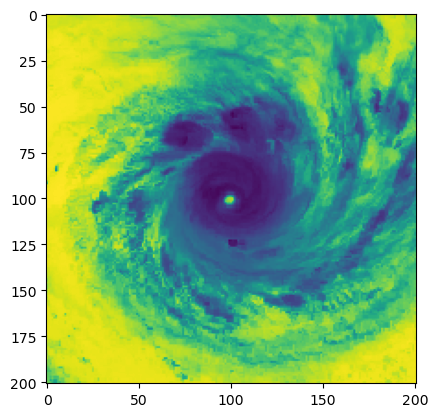

In [84]:
img = data_matrix[450,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img)

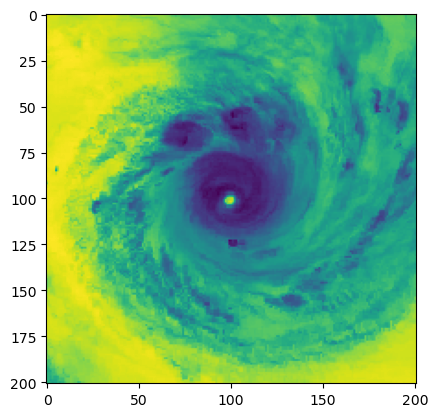

In [85]:
img = data_matrix[450,:,:,1].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img)

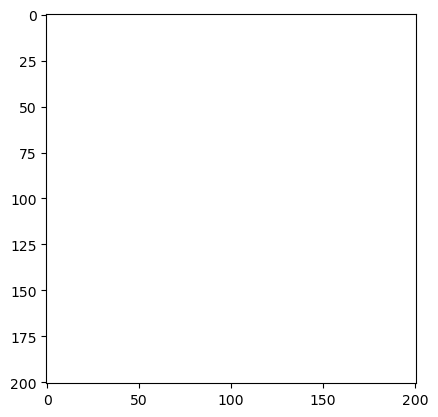

In [86]:
img = data_matrix[450,:,:,2].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img)

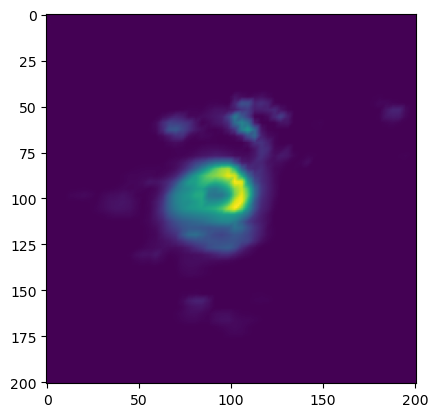

In [87]:
img = data_matrix[450,:,:,3].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img)

In [88]:
pos = ax.imshow(img)

In [89]:
print(ax.imshow(img))

AxesImage(143.2,52.8;369.6x369.6)


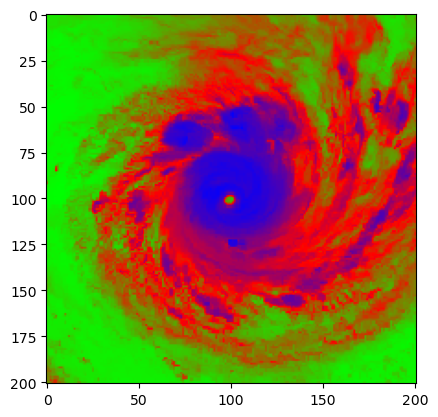

In [90]:
img = data_matrix[450,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.brg)

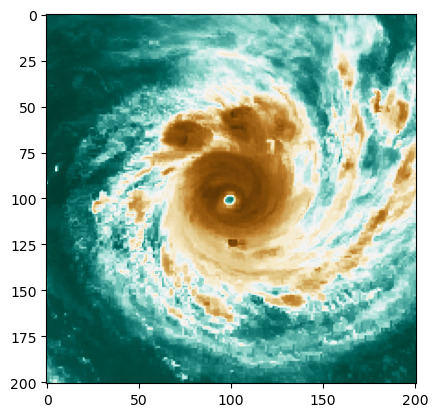

In [91]:
img = data_matrix[450,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.BrBG)

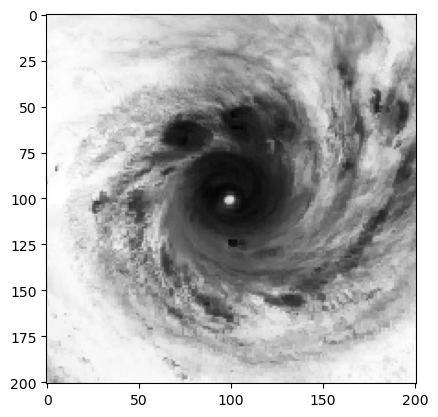

In [92]:
img = data_matrix[450,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.binary_r)

In [34]:
# data_info = data_info.assign(time=pd.to_datetime(data_info.time, format = r'%y%m%d%H'))

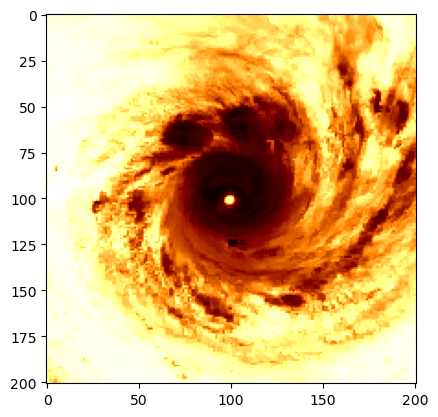

In [93]:
img = data_matrix[450,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.afmhot)

In [36]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0


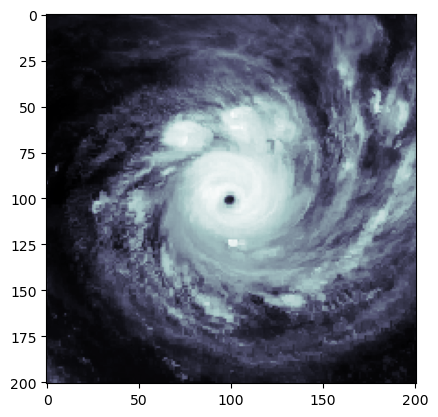

In [94]:
img = data_matrix[450,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.bone_r)

In [97]:
#data_info["time"] = pd.to_datetime(data_info["time"], format=r'%y%m%d%H')

In [95]:
data_info.sample(5)

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
3207,SH,201719S,174.8,-12.2,2017051421,20.0,0.0,1007.0
4336,WPAC,201728W,106.5,12.4,2017110412,40.0,45.0,993.0
1021,ATLN,201717L,-39.5,31.5,2017100718,30.0,0.0,1010.0
86,ATLN,201703L,-93.6,29.4,2017062206,45.0,80.0,991.0
2302,SH,201702S,113.7,-14.6,2016122003,35.0,40.0,996.0


In [40]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 0 to 4579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data_set   4580 non-null   object 
 1   ID         4580 non-null   object 
 2   lon        4580 non-null   float64
 3   lat        4580 non-null   float64
 4   time       4580 non-null   object 
 5   Vmax       4580 non-null   float64
 6   R35_4qAVG  4580 non-null   float64
 7   MSLP       4580 non-null   float64
dtypes: float64(5), object(3)
memory usage: 322.0+ KB


In [41]:
# data_info['time']=data_info['time'].astype(int)

In [42]:
# data_info = data_info.append(time=pd.to_datetime(data_info.time,format=r'%y%m%d%H'))

In [98]:
# keep only IR and PMW
x_irpmw = data_matrix[:,:,:,0::3]
y = data_info['Vmax'].values[:,np.newaxis]

In [99]:
x_irpmw[np.isnan(x_irpmw)] = 0
x_irpmw[x_irpmw > 1000] = 0

In [45]:
# class Preprocessing(keras.layers.Layer):
#     def __init__(self, name=None):
#         super(Preprocessing, self).__init__(trainable=trainable, name=name)
#     def call(self, inputs, training = None):
#         if training:
#             inputs = tf.image.rot90(inputs, k= np.random.randint(4))
#         return tf.image.central_crop(inputs, 0.5) 

In [46]:
# model.predict(test_x)

In [66]:
y_pred = model.predict(test_x)
print("testing...")
score = model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)
print("Test accuracy-> ",score[1])

13/13 [==============================] - 0s 23ms/step
testing...
26/26 [==============================] - 0s 14ms/step - loss: 205.2485 - mean_squared_error: 205.2485
Test accuracy->  205.24851989746094


In [67]:
abcd = []
for x in y_pred:
    abcd.append(int(x))

In [ ]:
cate=[]              #intensity valuation according to nasa
for x in abcd:
    if x<=33:
        cate.append("Tropical Depression")
    elif  x>33 and x<=63:
        cate.append('Tropical Strom')
    elif x>63 and x<=129:
        cate.append("Typhoon")
    elif x>129:
        cate.append("Super Typhoon")

In [ ]:
cate_data = list(zip(abcd,cate))

In [ ]:
intensity_df = pd.DataFrame(cate_data,columns=['Intensity(knot)','Category'])

In [ ]:
intensity_df

In [ ]:
# now our model can predict the intensity and the category of the cyclone

In [ ]:
# The Knot is a unit of speed equal to one nautical mile per hour, exactly 1.852 km/h

In [ ]:
# model

In [ ]:
# import pickle

In [ ]:
# pickle.dump(model, open('CNN_model.pkl','wb'))

In [ ]:
# the CNN model is ready and saved.... the size of our cnn model is 283MB

In [100]:
# trying deep cnn
# hypertuning the parameters
def train_val_model(train_x,train_y,val_x,val_y, n_epochs, batch_size):
    reg_param = 1e-5
    train_X = tf.convert_to_tensor(train_x)
    train_Y = tf.convert_to_tensor(train_y)
    val_X = tf.convert_to_tensor(val_x)
    val_Y = tf.convert_to_tensor(val_y)
    
    weights_initializer = keras.initializers.GlorotUniform()
    
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=16, kernel_size=4, strides=2, padding ='valid', activation='relu', input_shape=(201, 201, 2)),
        keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='valid', activation='relu'), 
        keras.layers.Conv2D (filters=64, kernel_size=3,  strides=2,padding='valid', activation='relu'),
        keras.layers.Conv2D (filters=128, kernel_size=3, strides=2, padding='valid', activation='relu'),
        keras.layers.Flatten(),

        keras.layers.Dense (256, activation='relu',kernel_initializer=weights_initializer),
        keras.layers.Dense (128, activation='relu',kernel_initializer=weights_initializer),
        keras.layers.Dense (1, activation='relu',kernel_initializer=weights_initializer),
    ])
    # compiling the model 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4,beta_1=0.99,beta_2=0.9999),
                  loss = 'mean_squared_error',
                  metrics=['mean_squared_error'],
                 )
    # training the model
    history = model.fit(train_X,train_Y,
                        epochs=n_epochs,
                        batch_size=batch_size,
                        verbose=1
                       )
    val_score = model.evaluate(val_X,val_Y)
    print("Val score:", val_score)
    return history, val_score, model

In [101]:
model_history=[]
val_scores=[]
n_epochs=50
batch_size=64
train_x,val_x,train_y,val_y = train_test_split(x_irpmw,y, random_state=101, test_size=0.1)
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y, random_state=101, test_size=0.1)
history,val_score,model=train_val_model(train_x,train_y,val_x,val_y,n_epochs,batch_size)
model_history.append(history)
val_scores.append(val_score)

Epoch 1/50


C:\Users\Sudhanshu\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


58/58 [==============================] - 17s 269ms/step - loss: 1679.0125 - mean_squared_error: 1679.0125
Epoch 2/50
58/58 [==============================] - 16s 281ms/step - loss: 704.2380 - mean_squared_error: 704.2380
Epoch 3/50
58/58 [==============================] - 15s 255ms/step - loss: 573.2207 - mean_squared_error: 573.2207
Epoch 4/50
58/58 [==============================] - 14s 235ms/step - loss: 403.4442 - mean_squared_error: 403.4442
Epoch 5/50
58/58 [==============================] - 13s 224ms/step - loss: 373.4601 - mean_squared_error: 373.4601
Epoch 6/50
58/58 [==============================] - 13s 226ms/step - loss: 349.8717 - mean_squared_error: 349.8717
Epoch 7/50
58/58 [==============================] - 13s 226ms/step - loss: 331.5234 - mean_squared_error: 331.5234
Epoch 8/50
58/58 [==============================] - 13s 226ms/step - loss: 335.8899 - mean_squared_error: 335.8899
Epoch 9/50
58/58 [==============================] - 13s 229ms/step - loss: 342.6903 - mea

In [102]:
model.predict(test_x)

13/13 [==============================] - 0s 25ms/step


array([[ 50.262127],
       [ 35.455967],
       [ 28.409746],
       [ 56.729427],
       [ 27.983139],
       [ 34.858055],
       [ 56.348812],
       [ 36.801296],
       [ 29.915985],
       [ 96.403275],
       [ 79.03531 ],
       [ 25.94834 ],
       [ 23.166855],
       [ 62.388863],
       [ 91.68929 ],
       [ 30.77386 ],
       [ 75.06156 ],
       [ 28.03431 ],
       [ 79.78144 ],
       [ 36.40858 ],
       [ 61.55653 ],
       [ 26.141888],
       [ 38.599583],
       [ 91.980446],
       [ 75.10293 ],
       [ 52.68279 ],
       [ 37.81189 ],
       [ 30.327152],
       [ 23.127361],
       [ 24.465137],
       [ 45.49719 ],
       [ 70.94304 ],
       [ 91.19879 ],
       [ 39.05083 ],
       [ 32.95945 ],
       [ 29.333015],
       [ 43.243526],
       [ 22.031584],
       [ 23.630836],
       [ 54.124645],
       [ 74.34609 ],
       [ 92.95717 ],
       [ 51.045635],
       [ 68.58853 ],
       [ 32.944485],
       [ 36.27269 ],
       [ 43.402355],
       [ 50.3

In [103]:
y_pred = model.predict(test_x)
print("testing...")
score = model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)
print("Test accuracy-> ",score[1])

13/13 [==============================] - 0s 22ms/step
testing...
26/26 [==============================] - 0s 13ms/step - loss: 181.4322 - mean_squared_error: 181.4322
Test accuracy->  181.43215942382812


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 16)        528       
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 256)               3965184   
                                                                 
 dense_1 (Dense)             (None, 128)               3

In [54]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x0000026497194190>>

In [104]:
model.predict(test_x)

13/13 [==============================] - 0s 22ms/step


array([[ 50.262127],
       [ 35.455967],
       [ 28.409746],
       [ 56.729427],
       [ 27.983139],
       [ 34.858055],
       [ 56.348812],
       [ 36.801296],
       [ 29.915985],
       [ 96.403275],
       [ 79.03531 ],
       [ 25.94834 ],
       [ 23.166855],
       [ 62.388863],
       [ 91.68929 ],
       [ 30.77386 ],
       [ 75.06156 ],
       [ 28.03431 ],
       [ 79.78144 ],
       [ 36.40858 ],
       [ 61.55653 ],
       [ 26.141888],
       [ 38.599583],
       [ 91.980446],
       [ 75.10293 ],
       [ 52.68279 ],
       [ 37.81189 ],
       [ 30.327152],
       [ 23.127361],
       [ 24.465137],
       [ 45.49719 ],
       [ 70.94304 ],
       [ 91.19879 ],
       [ 39.05083 ],
       [ 32.95945 ],
       [ 29.333015],
       [ 43.243526],
       [ 22.031584],
       [ 23.630836],
       [ 54.124645],
       [ 74.34609 ],
       [ 92.95717 ],
       [ 51.045635],
       [ 68.58853 ],
       [ 32.944485],
       [ 36.27269 ],
       [ 43.402355],
       [ 50.3

In [56]:
abcd = []
for x in y_pred:
    abcd.append(int(x))

In [57]:
cate=[]              #intensity valuation according to nasa
for x in abcd:
    if x<=33:
        cate.append("Tropical Depression")
    elif  x>33 and x<=63:
        cate.append('Tropical Strom')
    elif x>63 and x<=129:
        cate.append("Typhoon")
    elif x>129:
        cate.append("Super Typhoon")

In [58]:
cate_data = list(zip(abcd,cate))

In [59]:
intensity_df2Dcnn = pd.DataFrame(cate_data,columns=['Intensity(knot)','Category'])

In [60]:
intensity_df2Dcnn.sample(10) 

,Intensity(knot),Category
247,32,Tropical Depression
333,53,Tropical Strom
409,29,Tropical Depression
324,83,Typhoon
10,98,Typhoon
251,51,Tropical Strom
32,71,Typhoon
163,31,Tropical Depression
300,86,Typhoon
157,75,Typhoon


In [ ]:
intensity_df.last    # alexnet cnn

In [ ]:
intensity_df2Dcnn.last  # deep cnn 

In [ ]:
test_x.shape

In [105]:
import pickle as pp

In [ ]:
pp.dump(model, open('DeepCNN_model.pkl','wb'))

In [106]:
from keras.models import Model
# save the model to an HDF5 file
# model.save("my_model.h5")

In [ ]:
model.save("DeepCNN_model.h5")

In [107]:
config = model.get_config()

In [108]:
config

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 201, 201, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_4_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_4',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 201, 201, 2),
    'filters': 16,
    'kernel_size': (4, 4),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_5',
    'trainable': True,
    'dty

In [ ]:
model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)

In [ ]:
model.save_weights('savedModel/')

In [ ]:
model.load_weights('savedModel/')

In [ ]:
model.save('wasteModel2.h5')

In [ ]:
model.summary()

In [65]:
test_x.size

33371226

In [112]:
from sklearn.metrics import r2_score

In [121]:
output=model.predict(train_x)

116/116 [==============================] - 3s 25ms/step


In [122]:
train_x

array([[[[2.83179993e+02, 0.00000000e+00],
         [2.90829987e+02, 0.00000000e+00],
         [2.90829987e+02, 0.00000000e+00],
         ...,
         [2.66179993e+02, 0.00000000e+00],
         [2.69420013e+02, 0.00000000e+00],
         [2.67869995e+02, 0.00000000e+00]],

        [[2.93299988e+02, 0.00000000e+00],
         [2.93299988e+02, 0.00000000e+00],
         [2.93589996e+02, 0.00000000e+00],
         ...,
         [2.66179993e+02, 0.00000000e+00],
         [2.66179993e+02, 0.00000000e+00],
         [2.69420013e+02, 0.00000000e+00]],

        [[2.93790009e+02, 0.00000000e+00],
         [2.93790009e+02, 0.00000000e+00],
         [2.93709991e+02, 0.00000000e+00],
         ...,
         [2.40660004e+02, 0.00000000e+00],
         [2.40660004e+02, 0.00000000e+00],
         [2.35050003e+02, 0.00000000e+00]],

        ...,

        [[2.91209991e+02, 0.00000000e+00],
         [2.93809998e+02, 0.00000000e+00],
         [2.93809998e+02, 0.00000000e+00],
         ...,
         [2.48639999e

In [128]:
r2_score(output[:],train_y[:])

0.9235969871196001